In [16]:
import pandas as pd
df=pd.read_csv('c:/data/ozone/ozone2.csv')
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.00000,190.000000,7.4,67,5,1
1,36.00000,118.000000,8.0,72,5,2
2,12.00000,149.000000,12.6,74,5,3
3,18.00000,313.000000,11.5,62,5,4
4,42.12931,185.931507,14.3,56,5,5


In [17]:
X=df[['Solar.R','Wind','Temp']]
y=df['Ozone']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7) 

In [19]:
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(8,input_shape=(len(X_train.columns),),activation='relu', name='input'))
model.add(Dense(4,activation='relu', name='hidden-1')) #activation: 활성화 함수(출력값 조절)
model.add(Dense(2,activation='relu', name='hidden-2')) #relu: x<=0 - 0 / x>0 - x
model.add(Dense(1, name='output'))
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 8)                 32        
                                                                 
 hidden-1 (Dense)            (None, 4)                 36        
                                                                 
 hidden-2 (Dense)            (None, 2)                 10        
                                                                 
 output (Dense)              (None, 1)                 3         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [20]:
#스케일링
X_train.boxplot()
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() #평균 0, 표준편차 1 vs MinMaxScaler: 0~1
scaler.fit(X_train) #학습용 데이터 패턴 분석
X_train_scaled=scaler.transform(X_train) #학습용 변환
X_test_scaled=scaler.transform(X_test) #검증용 변환
X_train_scaled=pd.DataFrame(X_train_scaled)
X_test_scaled=pd.DataFrame(X_test_scaled)

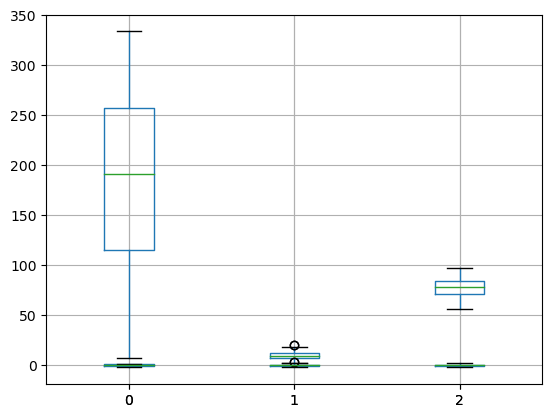

In [21]:
import matplotlib.pyplot as plt
X_train_scaled.boxplot()
plt.show()

In [22]:
#학습
from keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor='val_loss',patience=50)
#                           학습 종료 기준
#                           loss=train loss
#                           val_loss=validation loss
hist=model.fit(X_train_scaled,y_train,epochs=500,validation_split=0.2,callbacks=[early_stopping])
#                                     반복 횟수  ,학습에 간접적 참여(참고자료)
#                                                파라미터 최적화, 조기 학습 종료
#일반적으로 train:test:validation=6:2:2 정도 할당

Epoch 1/500
4/4 [==============================] - 1s 53ms/step - loss: 2714.5667 - mse: 2714.5667 - mae: 41.9387 - val_loss: 2001.0245 - val_mse: 2001.0245 - val_mae: 38.1490
Epoch 2/500
4/4 [==============================] - 0s 11ms/step - loss: 2714.1963 - mse: 2714.1963 - mae: 41.9340 - val_loss: 2000.6205 - val_mse: 2000.6205 - val_mae: 38.1435
Epoch 3/500
4/4 [==============================] - 0s 11ms/step - loss: 2713.7913 - mse: 2713.7913 - mae: 41.9292 - val_loss: 2000.2222 - val_mse: 2000.2222 - val_mae: 38.1383
Epoch 4/500
4/4 [==============================] - 0s 11ms/step - loss: 2713.3621 - mse: 2713.3621 - mae: 41.9243 - val_loss: 1999.8188 - val_mse: 1999.8188 - val_mae: 38.1330
Epoch 5/500
4/4 [==============================] - 0s 22ms/step - loss: 2712.9463 - mse: 2712.9463 - mae: 41.9192 - val_loss: 1999.3967 - val_mse: 1999.3967 - val_mae: 38.1275
Epoch 6/500
4/4 [==============================] - 0s 18ms/step - loss: 2712.4890 - mse: 2712.4890 - mae: 41.9138 - val_

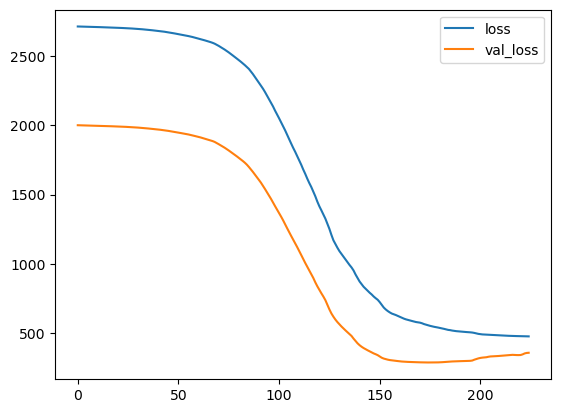

In [23]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

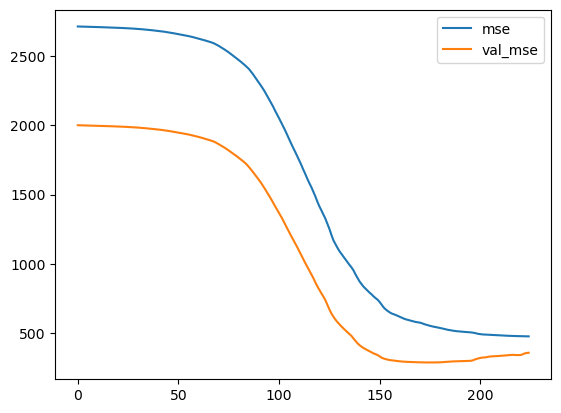

In [24]:
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.legend(['mse','val_mse'])
plt.show()

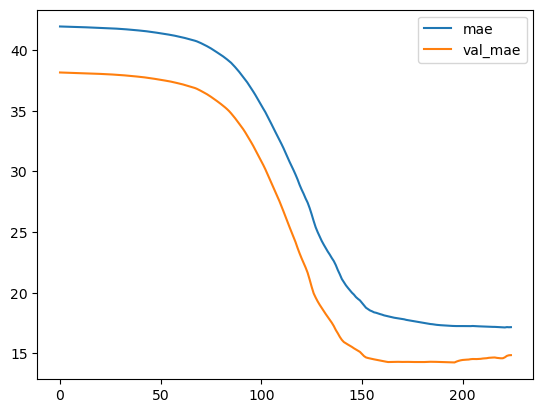

In [25]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.legend(['mae','val_mae'])
plt.show()

In [28]:
scores=model.evaluate(X_train_scaled,y_train)
print(scores)
scores=model.evaluate(X_test_scaled,y_test)
print(scores)
scores=model.evaluate(X_test,y_test) # 스케일링 안 된 데이터
print(scores)

4/4 [==============================] - 0s 3ms/step - loss: 451.0027 - mse: 451.0027 - mae: 16.6929
[451.00274658203125, 451.00274658203125, 16.69293785095215]
1/1 [==============================] - 0s 40ms/step - loss: 418.6941 - mse: 418.6941 - mae: 15.4742
[418.6941223144531, 418.6941223144531, 15.474191665649414]
1/1 [==============================] - 0s 27ms/step - loss: 35361524.0000 - mse: 35361524.0000 - mae: 5663.3823
[35361524.0, 35361524.0, 5663.38232421875]


In [29]:
from sklearn.metrics import r2_score
pred=model.predict(X_test_scaled)
r2_score(y_test, pred)

1/1 [==============================] - 0s 61ms/step


0.27673521335566587